<a href="https://colab.research.google.com/github/AmitSP-beep/Regression-Using-Forward-Backward-Elimination/blob/main/Regression_and_model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing basic libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Importing Dataset**

In [2]:
df=pd.read_csv('/content/drive/MyDrive/datasets/Data_Ready_to_clean.csv')
df.head()
df.shape

(8777, 17)

**Removing unnecessary Columns**

In [3]:
df1=df.drop(columns=['Title','Start_Date','broadcast_day','source'])
df1.iloc[72]

,72
Mean_rating,NaN
Rank,15827
Popularity,15990
Users,234
Users_Rated,44
Media_Type,tv
Status,finished_airing
Genres,"[{'id': 15, 'name': 'Kids'}, {'id': 19, 'name'..."
Number_episode,50
Started,"{'year': 1999, 'season': 'fall'}"


**Checking For NA Value**

In [4]:
df1.isna().sum()

,0
Mean_rating,116
Rank,0
Popularity,0
Users,0
Users_Rated,0
Media_Type,0
Status,0
Genres,8
Number_episode,0
Started,0


**There are 116 NA values in Mean_rating , so we will check nature of variable to deal with these NA**

**Behaviour of Mean_rating**

-0.053959455892897336

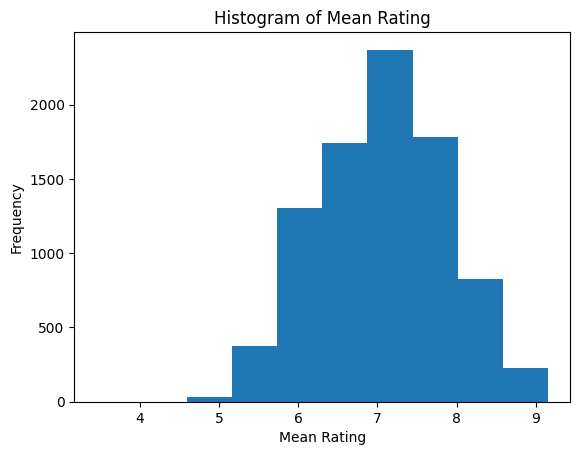

In [5]:
plt1=df1.Mean_rating.plot(kind='hist',title='Histogram of Mean Rating')
plt1.set_xlabel('Mean Rating')
plt1.set_ylabel('Frequency')
df1.Mean_rating.skew()

**For Mean_rating filling mean for NA as histogram of Mean_rating is nearly symmetric and skewness is close to 0**

**As there are only 8 NA for Genre out of 8000+ data points we'll drop them same for rating as there are only 61 NA**



**Handling NA values for different columns**

In [6]:
df1.Mean_rating.fillna(df.Mean_rating.mean(),inplace=True)
df1.dropna(inplace=True)

In [7]:
df1.shape

(8708, 13)

**No NaN in data**

In [8]:
df1.isna().sum()


,0
Mean_rating,0
Rank,0
Popularity,0
Users,0
Users_Rated,0
Media_Type,0
Status,0
Genres,0
Number_episode,0
Started,0


In [9]:
df1

,Mean_rating,Rank,Popularity,Users,Users_Rated,Media_Type,Status,Genres,Number_episode,Started,average_episode_duration,rating,studios
0,7.71,1049,2892,40743,13338,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",50,"{'year': 1999, 'season': 'spring'}",1445,pg_13,"[{'id': 14, 'name': 'Sunrise'}, {'id': 1260, '..."
1,8.07,472,4347,17849,6478,ova,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",28,"{'year': 1999, 'season': 'fall'}",1560,r,"[{'id': 8, 'name': 'Artland'}, {'id': 207, 'na..."
2,7.74,976,2553,51255,23826,tv,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na...",1787,"{'year': 1979, 'season': 'spring'}",660,pg,"[{'id': 247, 'name': 'Shin-Ei Animation'}]"
3,8.63,66,26,1812581,1020274,tv,currently_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",0,"{'year': 1999, 'season': 'fall'}",1440,pg_13,"[{'id': 18, 'name': 'Toei Animation'}]"
4,7.77,924,2135,70125,43599,movie,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na...",1,"{'year': 2000, 'season': 'winter'}",2460,pg,"[{'id': 18, 'name': 'Toei Animation'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8772,7.28,2536,3229,33568,10147,tv,finished_airing,"[{'id': 19, 'name': 'Music'}]",13,"{'year': 2021, 'season': 'fall'}",1420,pg_13,"[{'id': 95, 'name': 'Doga Kobo'}]"
8773,7.30,2406,3299,32202,15146,ona,finished_airing,"[{'id': 4, 'name': 'Comedy'}, {'id': 36, 'name...",10,"{'year': 2021, 'season': 'fall'}",1113,pg_13,[]
8774,7.15,3191,3377,30517,4149,tv,currently_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na...",24,"{'year': 2021, 'season': 'fall'}",1449,pg_13,"[{'id': 14, 'name': 'Sunrise'}]"
8775,6.65,5420,3340,31146,5138,tv,finished_airing,"[{'id': 19, 'name': 'Music'}, {'id': 37, 'name...",12,"{'year': 2021, 'season': 'fall'}",1452,pg_13,"[{'id': 56, 'name': 'A-1 Pictures'}]"


**Extracting Year and Season of release from 'Started' column**

In [10]:
import ast
def yr_s_extractor(x):
  x=ast.literal_eval(x)
  return x['year'],x['season']

df1[['Year','Season']]=df1['Started'].apply(yr_s_extractor).apply(pd.Series)
df1.drop(columns=['Started'],inplace=True)


**Extracting Studio Names**


In [11]:
import ast

def std_extract(x):
    x = ast.literal_eval(x)
    if len(x) > 0:
        return x[0]['name']
    else:
        return None

# Apply the function to the 'studios' column and create a new 'Studio' column

df1['Studio'] = df1['studios'].apply(std_extract)
df1.drop(columns=['studios'], inplace=True)
df1.head()


,Mean_rating,Rank,Popularity,Users,Users_Rated,Media_Type,Status,Genres,Number_episode,average_episode_duration,rating,Year,Season,Studio
0,7.71,1049,2892,40743,13338,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",50,1445,pg_13,1999,spring,Sunrise
1,8.07,472,4347,17849,6478,ova,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",28,1560,r,1999,fall,Artland
2,7.74,976,2553,51255,23826,tv,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na...",1787,660,pg,1979,spring,Shin-Ei Animation
3,8.63,66,26,1812581,1020274,tv,currently_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",0,1440,pg_13,1999,fall,Toei Animation
4,7.77,924,2135,70125,43599,movie,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na...",1,2460,pg,2000,winter,Toei Animation


**NA from Studious**

In [12]:
df1.Studio.fillna('Unknown',inplace=True)
df1.isna().sum()

,0
Mean_rating,0
Rank,0
Popularity,0
Users,0
Users_Rated,0
Media_Type,0
Status,0
Genres,0
Number_episode,0
average_episode_duration,0


**Extracting Genres**

In [13]:
def name(x):
  A = []
  for i in ast.literal_eval(x):
    A.append(i['name'])
  return A

df1['Genres'] = df1['Genres'].apply(name)

In [14]:
df1

,Mean_rating,Rank,Popularity,Users,Users_Rated,Media_Type,Status,Genres,Number_episode,average_episode_duration,rating,Year,Season,Studio
0,7.71,1049,2892,40743,13338,tv,finished_airing,"[Action, Adventure, Drama, Mecha, Military, Ro...",50,1445,pg_13,1999,spring,Sunrise
1,8.07,472,4347,17849,6478,ova,finished_airing,"[Action, Drama, Military, Sci-Fi, Space]",28,1560,r,1999,fall,Artland
2,7.74,976,2553,51255,23826,tv,finished_airing,"[Adventure, Comedy, Fantasy, Kids, Sci-Fi, Sho...",1787,660,pg,1979,spring,Shin-Ei Animation
3,8.63,66,26,1812581,1020274,tv,currently_airing,"[Action, Adventure, Comedy, Drama, Fantasy, Sh...",0,1440,pg_13,1999,fall,Toei Animation
4,7.77,924,2135,70125,43599,movie,finished_airing,"[Adventure, Comedy, Kids, Sci-Fi]",1,2460,pg,2000,winter,Toei Animation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8772,7.28,2536,3229,33568,10147,tv,finished_airing,[Music],13,1420,pg_13,2021,fall,Doga Kobo
8773,7.30,2406,3299,32202,15146,ona,finished_airing,"[Comedy, Slice of Life]",10,1113,pg_13,2021,fall,Unknown
8774,7.15,3191,3377,30517,4149,tv,currently_airing,"[Adventure, Comedy, Demons, Fantasy, Historica...",24,1449,pg_13,2021,fall,Sunrise
8775,6.65,5420,3340,31146,5138,tv,finished_airing,"[Music, Supernatural, Vampire]",12,1452,pg_13,2021,fall,A-1 Pictures


**Encoding Catogorical Variables and**
**Also removing one column of each encoded catogory to avoid multicollinearity**

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe=OneHotEncoder(sparse_output=False,drop='first')
tf1=ColumnTransformer(
    transformers=[
       ( 'ohe', OneHotEncoder(drop='first'), ['Media_Type','Status','rating','Season'])
    ] , remainder='drop'
)
encoded_d=tf1.fit_transform(df1)
df1_encoded=pd.DataFrame(encoded_d.toarray(),columns=tf1.get_feature_names_out())
df1_encoded

,ohe__Media_Type_music,ohe__Media_Type_ona,ohe__Media_Type_ova,ohe__Media_Type_special,ohe__Media_Type_tv,ohe__Status_finished_airing,ohe__rating_pg,ohe__rating_pg_13,ohe__rating_r,ohe__rating_r+,ohe__Season_spring,ohe__Season_summer,ohe__Season_winter
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8704,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8705,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8706,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Merging Encoded and original Data Frames**

In [16]:
df_non_encoded=df1.drop(columns=['Media_Type','Status','rating','Season'])
df_non_encoded
new_df=pd.concat([df_non_encoded,df1_encoded], axis=1)
new_df.dropna(inplace=True)
new_df

,Mean_rating,Rank,Popularity,Users,Users_Rated,Genres,Number_episode,average_episode_duration,Year,Studio,...,ohe__Media_Type_special,ohe__Media_Type_tv,ohe__Status_finished_airing,ohe__rating_pg,ohe__rating_pg_13,ohe__rating_r,ohe__rating_r+,ohe__Season_spring,ohe__Season_summer,ohe__Season_winter
0,7.71,1049.0,2892.0,40743.0,13338.0,"[Action, Adventure, Drama, Mecha, Military, Ro...",50.0,1445.0,1999.0,Sunrise,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,8.07,472.0,4347.0,17849.0,6478.0,"[Action, Drama, Military, Sci-Fi, Space]",28.0,1560.0,1999.0,Artland,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7.74,976.0,2553.0,51255.0,23826.0,"[Adventure, Comedy, Fantasy, Kids, Sci-Fi, Sho...",1787.0,660.0,1979.0,Shin-Ei Animation,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,8.63,66.0,26.0,1812581.0,1020274.0,"[Action, Adventure, Comedy, Drama, Fantasy, Sh...",0.0,1440.0,1999.0,Toei Animation,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,7.77,924.0,2135.0,70125.0,43599.0,"[Adventure, Comedy, Kids, Sci-Fi]",1.0,2460.0,2000.0,Toei Animation,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,7.74,975.0,2132.0,70211.0,34302.0,"[Comedy, Ecchi, School, Seinen, Slice of Life]",0.0,1260.0,1992.0,Shin-Ei Animation,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8704,8.38,177.0,8598.0,3028.0,1280.0,"[Action, Fantasy, Martial Arts]",13.0,1440.0,2021.0,Motion Magic,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8705,8.38,179.0,490.0,365298.0,189762.0,"[Action, Demons, Historical, Shounen, Supernat...",7.0,1455.0,2021.0,ufotable,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8706,8.54,97.0,605.0,305289.0,94377.0,"[Action, Adventure, Shounen]",0.0,1469.0,2021.0,David Production,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
new_df.to_csv('/content/drive/MyDrive/datasets/cleaned_data.csv',index=False)

**Outlier Detecion**


**For Mean_rating**

4.31


9.15

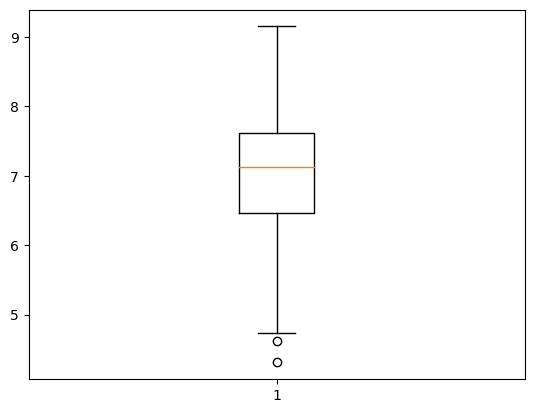

In [18]:

plt.boxplot(new_df.Mean_rating)
print(new_df.Mean_rating.min())
new_df.Mean_rating.max()



**Rating Close to 4 is is genuine data point so we cannot remove them**

**For Rank**

In [19]:

print(min(new_df.Rank))
max(new_df.Rank)


1.0


17427.0

**17427 as maximum rank is due to there are animes which were not included in this list whoose rank was in between**

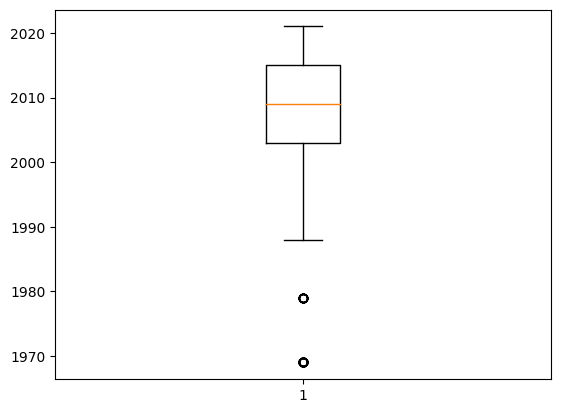

In [20]:
plt.boxplot(new_df.Year)
plt.show()


**From the plot we can see 2 ouliers but they are relevant to our dataset so we will not remove it**

In [21]:
new_df.describe()

,Mean_rating,Rank,Popularity,Users,Users_Rated,Number_episode,average_episode_duration,Year,ohe__Media_Type_music,ohe__Media_Type_ona,...,ohe__Media_Type_special,ohe__Media_Type_tv,ohe__Status_finished_airing,ohe__rating_pg,ohe__rating_pg_13,ohe__rating_r,ohe__rating_r+,ohe__Season_spring,ohe__Season_summer,ohe__Season_winter
count,8641.000000,8641.000000,8641.000000,8.641000e+03,8.641000e+03,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,...,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000
mean,7.061725,4150.658257,5672.342553,1.523466e+05,7.993977e+04,45.572156,1513.973961,2008.598195,0.052424,0.076033,...,0.108899,0.582224,0.898854,0.149520,0.496239,0.093971,0.032635,0.327856,0.172897,0.213285
std,0.789337,3322.639172,4374.561933,3.829792e+05,2.233405e+05,171.997305,1387.998260,8.159513,0.222894,0.265066,...,0.311531,0.493221,0.301539,0.356621,0.500015,0.291805,0.177690,0.469459,0.378180,0.409651
min,4.310000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1969.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.460000,1309.000000,1731.000000,2.597000e+03,7.550000e+02,1.000000,720.000000,2003.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.120000,3328.000000,4870.000000,1.335200e+04,4.751000e+03,12.000000,1435.000000,2009.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.610000,6700.000000,9011.000000,9.741300e+04,4.172300e+04,26.000000,1500.000000,2015.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9.150000,17427.000000,19350.000000,3.329181e+06,2.329206e+06,3057.000000,10081.000000,2021.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Removing outliers on the basis of above description**

In [22]:
ndf=new_df[~((new_df.Users==0) | (new_df.Users_Rated==0) | (new_df.Number_episode==0) | (new_df.average_episode_duration==0))]
ndf.head()
ndf.describe()

,Mean_rating,Rank,Popularity,Users,Users_Rated,Number_episode,average_episode_duration,Year,ohe__Media_Type_music,ohe__Media_Type_ona,...,ohe__Media_Type_special,ohe__Media_Type_tv,ohe__Status_finished_airing,ohe__rating_pg,ohe__rating_pg_13,ohe__rating_r,ohe__rating_r+,ohe__Season_spring,ohe__Season_summer,ohe__Season_winter
count,7788.000000,7788.000000,7788.000000,7.788000e+03,7.788000e+03,7788.000000,7788.000000,7788.000000,7788.000000,7788.000000,...,7788.000000,7788.000000,7788.000000,7788.000000,7788.000000,7788.000000,7788.000000,7788.000000,7788.000000,7788.000000
mean,7.049852,4180.079610,5623.945300,1.439058e+05,7.506606e+04,50.562404,1564.768618,2009.900873,0.051746,0.075116,...,0.109784,0.581793,0.900103,0.150488,0.494735,0.092193,0.033641,0.327555,0.173472,0.213020
std,0.780866,3330.022105,4396.290395,3.599359e+05,2.116690e+05,180.475339,1443.598127,6.755974,0.221529,0.263595,...,0.312641,0.493296,0.299882,0.357572,0.500004,0.289317,0.180316,0.469352,0.378679,0.409468
min,4.310000,1.000000,1.000000,8.100000e+01,1.100000e+01,1.000000,12.000000,1979.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.470000,1359.750000,1685.000000,2.565250e+03,7.650000e+02,1.000000,780.000000,2004.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.115000,3334.500000,4715.000000,1.447900e+04,5.369500e+03,12.000000,1440.000000,2010.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.590000,6619.750000,9042.750000,1.013240e+05,4.310500e+04,37.000000,1500.000000,2016.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9.150000,17427.000000,18401.000000,3.329181e+06,2.329206e+06,3057.000000,10081.000000,2021.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Exporting Final Dataset**

In [23]:
ndf.to_csv('/content/drive/MyDrive/datasets/Anime_Data_final.csv',index=False)

**Exploratory Data Analysis (EDA)**


**--Information about the variables--**

 1) **Rank** :-: Rank is determined by the average user rating (score) given to an anime

2) **Popularity** :-:  Popularity is determined by the number of users who have added the anime to their list (either planning to watch, watching, completed, etc.).


Text(0, 0.5, 'Mean Rating')

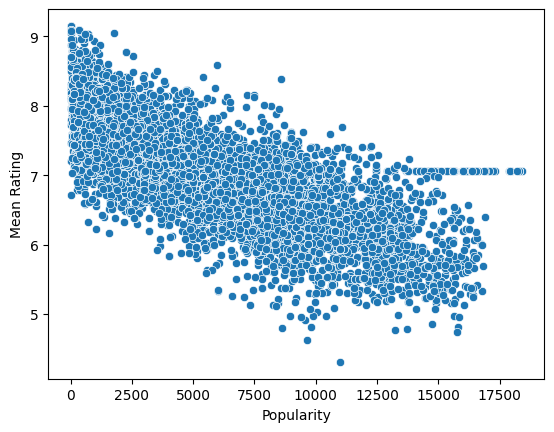

In [24]:

plot_1=sns.scatterplot(data=ndf,x='Popularity',y='Mean_rating')
plot_1.set_xlabel('Popularity')
plot_1.set_ylabel('Mean Rating')

**Conclusion :**

1) **High Expectations and Marketing Influence:** As popularity increases, often driven by strong marketing efforts, higher expectations are set. If the anime doesn't meet these expectations, it can lead to lower average ratings despite its popularity.

2)**Attraction of a Broader, Less Engaged Audience:** Popular anime may attract a larger audience, including viewers who are not particularly interested in anime or the specific genre. This broader appeal can result in lower ratings from viewers who may not fully appreciate or connect with the content.









**Having look at corrrelation between variables for EDA**

<Axes: >

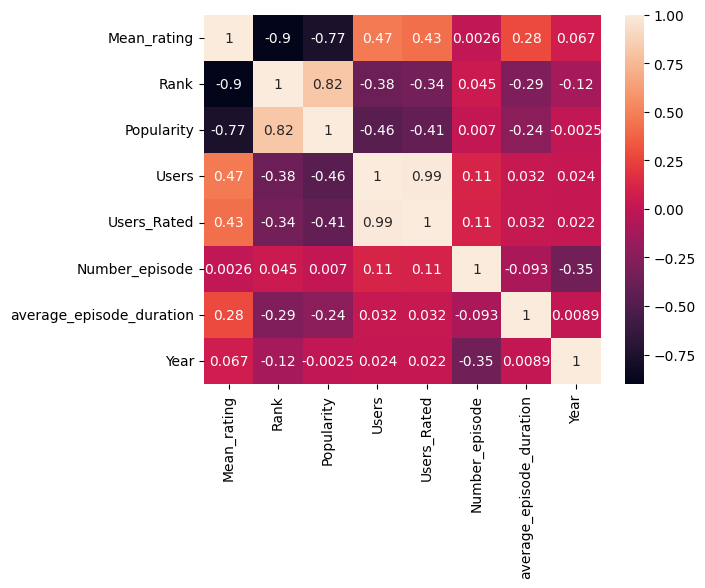

In [25]:
df_corr=ndf[['Mean_rating','Rank','Popularity','Users','Users_Rated','Number_episode','average_episode_duration','Year']].corr()
df_corr
sns.heatmap(df_corr,annot=True)

**Conclusion:**

1)**Especially for a scatterplot from the above heatmap we are unable to find more pair of variables with a visible pattern**

Text(0, 0.5, 'Rank')

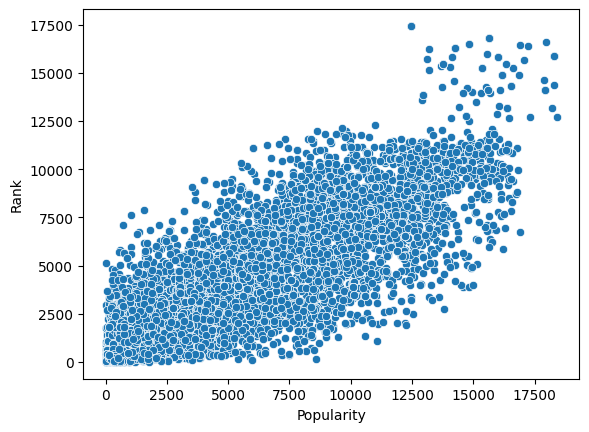

In [26]:
plot_2=sns.scatterplot(data=ndf,x='Popularity',y='Rank')
plot_2.set_xlabel('Popularity')
plot_2.set_ylabel('Rank')

**Reason for this pattern between rank and popularity can be seen via same reasons that were given for above plot because rank and mean rating are proportional to each other**

**Barplot for Genre**

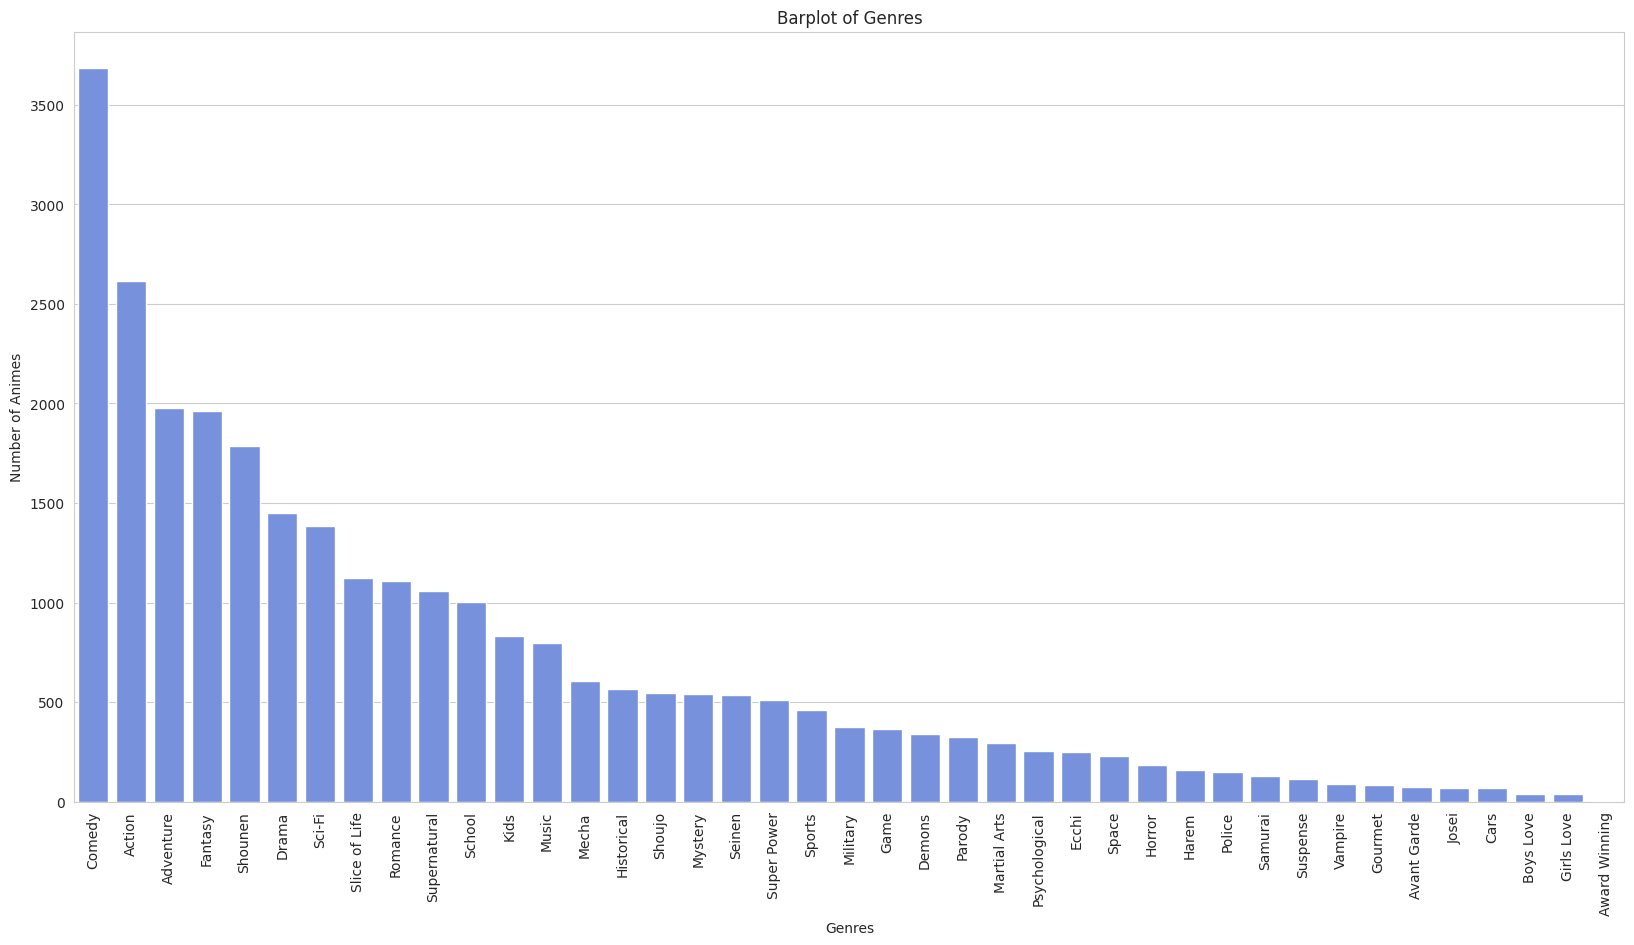

In [27]:
df_genre=ndf.explode('Genres')
counts=df_genre.value_counts('Genres')
sns.set_style('whitegrid')
sns.set_palette('coolwarm')
plt.figure(figsize=(20,10))
plt.title('Barplot of Genres')
sns.barplot(x=counts.index,y=counts.values)
plt.ylabel('Number of Animes')
plt.xticks(rotation=90)
plt.show()


**Conclusions:**

1)**The bar plot shows that Comedy is the most commonly produced genre among animes also action and adventure are produced on large extent**


<ipython-input-28-f7e87d6ad6bb>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl1.set_xticklabels(pl1.get_xticklabels(), rotation=90,fontsize=25)


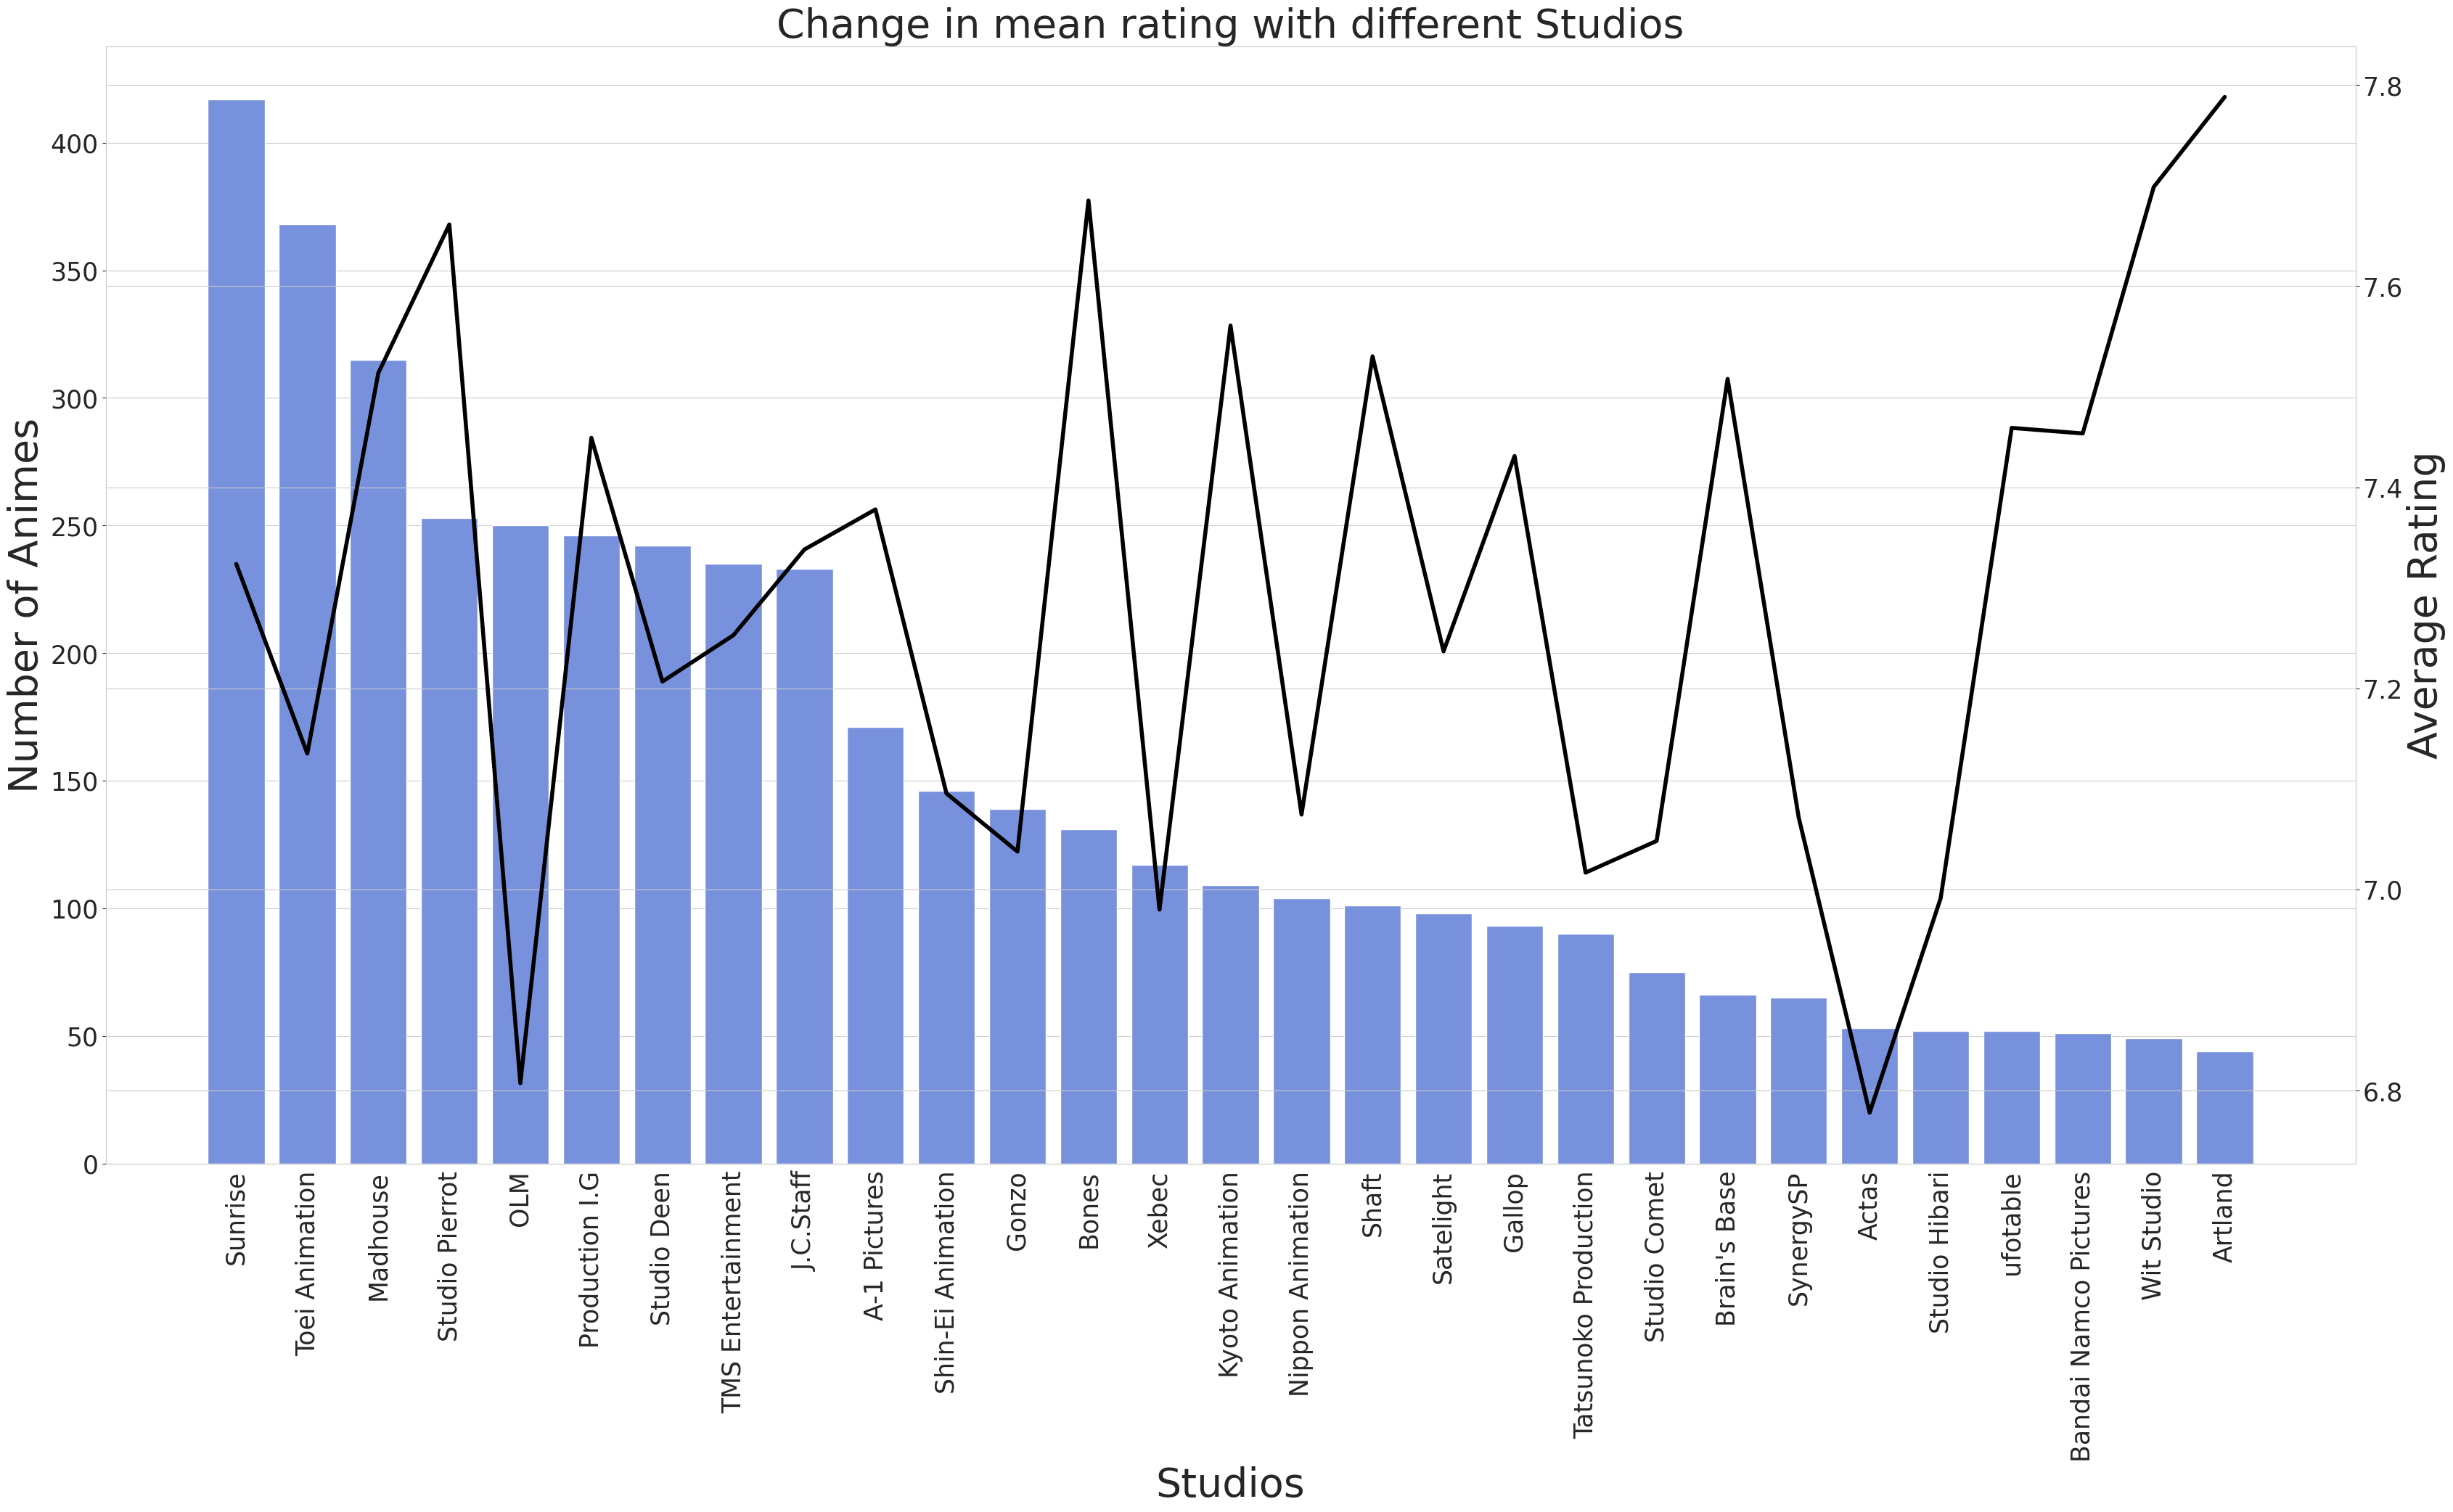

In [28]:
top = ndf.Studio.value_counts()
rating = ndf.groupby('Studio')['Mean_rating'].mean()
df_rating_std = pd.DataFrame({
    'Count': top,
    'Average_Rating': rating
}).sort_values(by='Count', ascending=False).iloc[1:30]
fig, pl1 = plt.subplots(figsize=(40, 20))
sns.set_palette('coolwarm')
pl1 = sns.barplot(x=df_rating_std.index, y=df_rating_std.Count)
pl1.set_ylabel('Number of Animes',fontsize=40)
pl1.tick_params(axis='y', labelsize=25)
pl1.set_xlabel('Studios',fontsize=40)
pl1.set_xticklabels(pl1.get_xticklabels(), rotation=90,fontsize=25)

pl2 = pl1.twinx()
pl2.set_ylabel('Average Rating',fontsize=40)
pl2.plot(df_rating_std.index, df_rating_std.Average_Rating, color='black', linestyle='-', linewidth=4)
pl2.tick_params(axis='y', labelsize=25)
plt.title('Change in mean rating with different Studios',fontsize=40)
plt.show()

**Conclusion:**

The bar plot shows the number of anime  produced by various studios.**Sunrise, Toei Animation, and Madhouse** are ahead in terms of quantity. However, the red line representing the average rating. The above graph suggests that a higher number of productions does not necessarily results with higher ratings. For example, studios like **Kyoto Animation,ufotable,bones** which produce fewer anime, but have higher average ratings, indicating a focus on quality over quantity. Conversely, some studios with a high output, such as Sunrise, do not achieve the same level of average ratings. This analysis highlights the diversity in studio strategies, balancing between the volume of content and the quality that audience demands

**Grouping by season to find some trend**

<ipython-input-29-218a58651512>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl1.set_xticklabels(pl1.get_xticklabels(), rotation=90,fontsize=10)


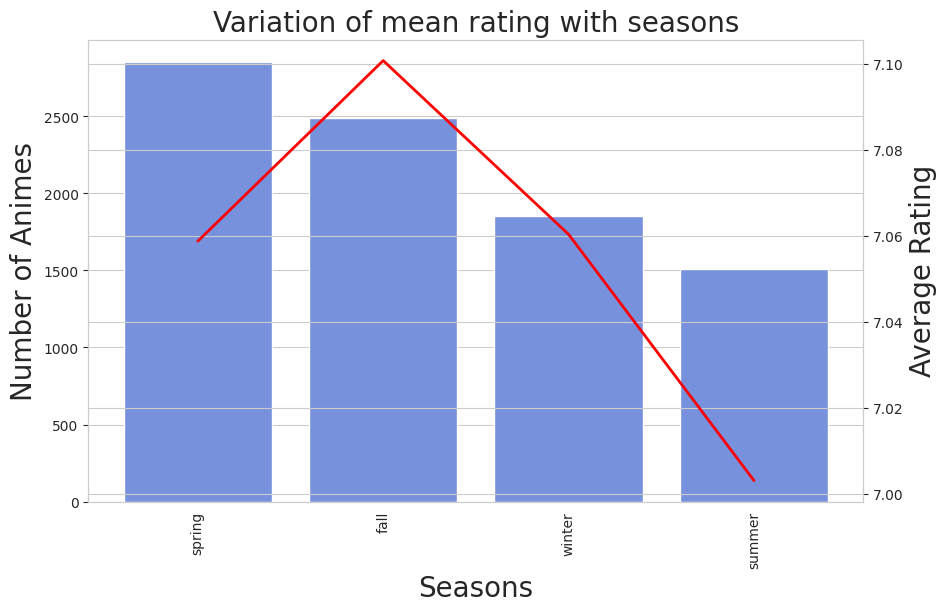

In [29]:
seasons = df1.Season.value_counts()
rating = df1.groupby('Season')['Mean_rating'].mean()
df_rating_sea = pd.DataFrame({
    'Count': seasons,
    'Average_Rating': rating
}).sort_values(by='Count', ascending=False)
df_rating_sea

fig, pl1 = plt.subplots(figsize=(10,6))
sns.set_palette('dark')
pl1 = sns.barplot(x=df_rating_sea.index, y=df_rating_sea.Count)
pl1.set_ylabel('Number of Animes',fontsize=20)
pl1.tick_params(axis='y', labelsize=10)
pl1.set_xlabel('Seasons',fontsize=20)
pl1.set_xticklabels(pl1.get_xticklabels(), rotation=90,fontsize=10)

pl2 = pl1.twinx()
pl2.set_ylabel('Average Rating',fontsize=20)
pl2.plot(df_rating_sea.index, df_rating_sea.Average_Rating, color='red', linestyle='-', linewidth=2)
pl2.tick_params(axis='y', labelsize=10)
plt.title('Variation of mean rating with seasons',fontsize=20)
plt.show()


**Conclusion:**

1)Spring Season Leads in Anime Releases and summer has least releases

2)Animes released in Fall has highest average rating

3) As we go from fall to summer as seasons progress No. of anime realeas as
well as their mean rating decreases (We can make assumption that consumers enjoy the content in a particular season and it decreases as season progresses)

**__Information about different ratings:__**

1) **G** (General Audiences)

2) **PG** (Parental Guidance Suggested)

3) **PG-13** (Parents Strongly Cautioned for age below 13)

4) **R** (Restricted for below 17 age)

5)**R+** (Strictly prohibited for below 17 age)








<ipython-input-30-e7d6e64d3d49>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl1.set_xticklabels(pl1.get_xticklabels(), rotation=90,fontsize=10)


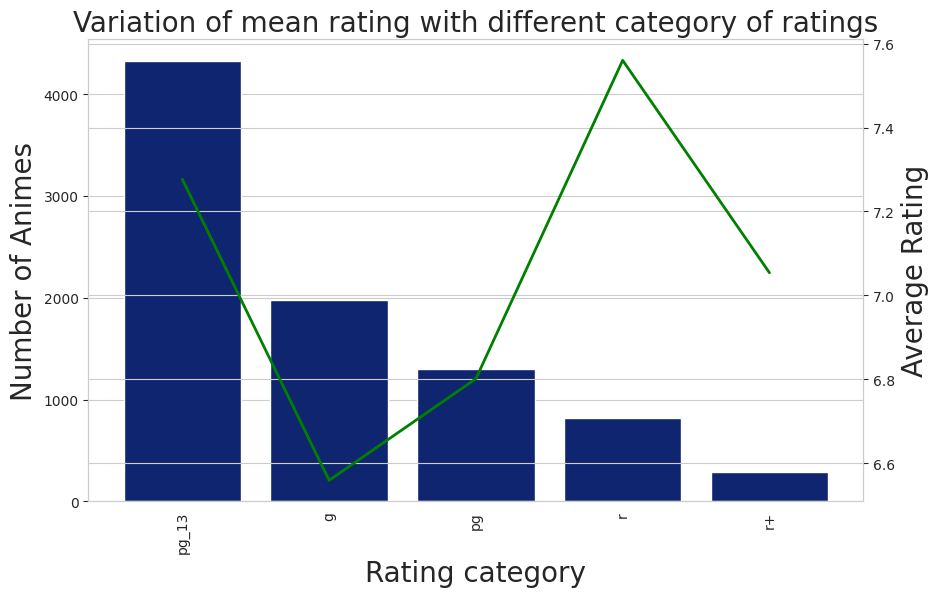

In [30]:
ratings = df1.rating.value_counts()
rating = df1.groupby('rating')['Mean_rating'].mean()
df_rating_ra = pd.DataFrame({
    'Count': ratings,
    'Average_Rating': rating
}).sort_values(by='Count', ascending=False)
df_rating_ra

fig, pl1 = plt.subplots(figsize=(10,6))
sns.set_palette('dark')
pl1 = sns.barplot(x=df_rating_ra.index, y=df_rating_ra.Count)
pl1.set_ylabel('Number of Animes',fontsize=20)
pl1.tick_params(axis='y', labelsize=10)
pl1.set_xlabel('Rating category',fontsize=20)
pl1.set_xticklabels(pl1.get_xticklabels(), rotation=90,fontsize=10)

pl2 = pl1.twinx()
pl2.set_ylabel('Average Rating',fontsize=20)
pl2.plot(df_rating_ra.index, df_rating_ra.Average_Rating, color='green', linestyle='-', linewidth=2)
pl2.tick_params(axis='y', labelsize=10)
plt.title('Variation of mean rating with different category of ratings',fontsize=20)
plt.show()


**Conclusion:**

1)Despite being widely accessible and family-friendly, **G-rated** animes have the lowest mean rating. This suggests a **diversity in audience preferences**, where content made for general audiences may not always resonate as strongly with viewers seeking more personalized themes

2)As we progress from **G to PG and then to R-rated** content, the mean rating increases significantly. This indicates audience **preference for content with more mature or restricted themes is more**. Although the number of animes in these categories is smaller, the higher ratings reflect a stronger positive response.


**Checking For assumptions of multiple linear regression**

1)Linear Relation between dependent and independent variable

2) No correlation between independent variable (No multicollinearity)

3)Homoscadasticity, {𝜖𝑖=(yi-y^i) is error term then(Var(𝜖𝑖)=σ2)


4) No correlation between error terms {Cov(ϵi​,ϵj)=0 for i!=j }

Both 3rd and 4th assumption can be combined by saying 𝜖𝑖~N(0,σ2) and they are independent and identically distributed.

**In this regresion analysis our dependent variable is *Mean_rating* and rest are being used to predict the dependent variable**

**Lets check first assumption of linear relation**





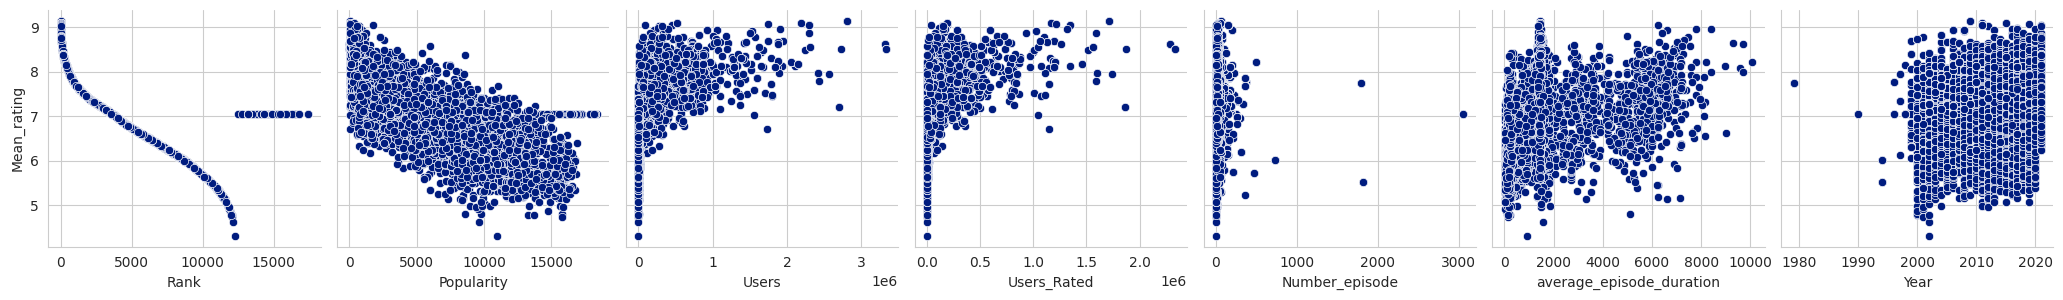

In [31]:

sns.pairplot(ndf,y_vars=['Mean_rating'],x_vars=['Rank','Popularity','Users','Users_Rated','Number_episode','average_episode_duration','Year'],height=3)




**Conclusion:**

In practical data analysis, it is often the case that many theoretical assumptions may not perfectly align with real-world data. However, through our analysis, we observed that the relationships observed in the plots are close to linear. This observation suggests that our first assumption the linearity between the dependent variable and the independent variables is reasonably met in our dataset.

**Now we'll check the assumption of collinearity using VIF**

**Variance Inflation Factor (VIF) is a metric used to quantify the degree of multicollinearity in a set of predictor variables in a regression model**

**To calculate VIF for feature X1 we regress X1 on remaining all regressors and calculate R-squared value for that model . We do the same to find VIF for all features to get thier VIF scores**

**Interpretation from VIF : If  { VIF(X1)>5 }then we remove that regressor from the model and if { VIF(X1)<5 } then we keep it. The threshold 5 is experimenter's choice generally 10 is used as threshold**




In [32]:
ndf.head(5)

,Mean_rating,Rank,Popularity,Users,Users_Rated,Genres,Number_episode,average_episode_duration,Year,Studio,...,ohe__Media_Type_special,ohe__Media_Type_tv,ohe__Status_finished_airing,ohe__rating_pg,ohe__rating_pg_13,ohe__rating_r,ohe__rating_r+,ohe__Season_spring,ohe__Season_summer,ohe__Season_winter
0,7.71,1049.0,2892.0,40743.0,13338.0,"[Action, Adventure, Drama, Mecha, Military, Ro...",50.0,1445.0,1999.0,Sunrise,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,8.07,472.0,4347.0,17849.0,6478.0,"[Action, Drama, Military, Sci-Fi, Space]",28.0,1560.0,1999.0,Artland,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7.74,976.0,2553.0,51255.0,23826.0,"[Adventure, Comedy, Fantasy, Kids, Sci-Fi, Sho...",1787.0,660.0,1979.0,Shin-Ei Animation,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7.77,924.0,2135.0,70125.0,43599.0,"[Adventure, Comedy, Kids, Sci-Fi]",1.0,2460.0,2000.0,Toei Animation,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,7.76,939.0,4643.0,15086.0,4610.0,"[Comedy, Police, Slice of Life]",373.0,1500.0,1996.0,Gallop,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


**Calculating VIF for each feature**

In [33]:
from sklearn.linear_model import LinearRegression
df_x=ndf.drop(columns=['Mean_rating','Genres','Studio'])
df_x.head()
df_vif=pd.DataFrame()
df_vif['Features']=df_x.columns
df_vif
def Vif_cal(x,reg_i):
  x_new=np.delete(x,reg_i,1)
  target=x[ : , reg_i]
  model=LinearRegression().fit(x_new,target)
  r2=model.score(x_new,target)
  vif=1/(1-r2)
  return vif

df_vif['VIF']=[Vif_cal(df_x.values,i) for i in range(df_x.shape[1])]
df_vif


,Features,VIF
0,Rank,3.330785
1,Popularity,3.559630
2,Users,46.777076
3,Users_Rated,44.308998
4,Number_episode,1.193121
5,average_episode_duration,1.117213
6,Year,1.405219
7,ohe__Media_Type_music,1.521420
8,ohe__Media_Type_ona,1.706783
9,ohe__Media_Type_ova,1.744822


**Conclusion:**

**1)VIF values of all the regressors are less than 5 except 'users' and 'users_rated'**

**2)Now we'll remove one of the variable and repeat the same process to check for multicollinearity**

**--Lets remove users--**

(**Reason** : Reason behind removing users and keeping users_rated is because user's who rate a certain anime are more involded audience than someone who is just willing to watch or following it someway also users who rated are important for our dependent variable)


In [34]:
df_x2=ndf.drop(columns=['Mean_rating','Genres','Studio','Users'])
df_x2.head()
df_vif2=pd.DataFrame()
df_vif2['Features']=df_x2.columns
df_vif2
def Vif_cal2(x,reg_i):
  x_new2=np.delete(x,reg_i,1)
  target2=x[ : , reg_i]
  model=LinearRegression().fit(x_new2,target2)
  r2=model.score(x_new2,target2)
  vif=1/(1-r2)
  return vif

df_vif2['VIF']=[Vif_cal2(df_x2.values,i) for i in range(df_x2.shape[1])]
df_vif2


,Features,VIF
0,Rank,3.329215
1,Popularity,3.394373
2,Users_Rated,1.240047
3,Number_episode,1.186059
4,average_episode_duration,1.109450
5,Year,1.403537
6,ohe__Media_Type_music,1.520450
7,ohe__Media_Type_ona,1.706771
8,ohe__Media_Type_ova,1.744796
9,ohe__Media_Type_special,1.905511


**Conclusion:**

**1)All the VIF values are now less than 5 so we can say there is no multicollinearity in our data**

**2)But in the scatterplot a clear linear pattern was observed between 'Rank' and 'Popularity', it might be a case that our VIF failed to capture the correlation between these features.**

**So now we'll fit 2 models one with including both variable and another with excluding one of them and we'll calculate  $R^2$adj.  for both models and then can make decision about choosing the model**


**First we'll keep both the variables**

In [35]:
from sklearn.linear_model import LinearRegression
data=ndf.drop(columns=['Genres','Studio','Users'])
data.head()
ind=data.drop(columns=['Mean_rating'])
dep=data['Mean_rating']
reg_model=LinearRegression()
reg_model.fit(ind,dep)



LinearRegression()

**Lets check assumption of 𝜖𝑖~N(0,σ2) and they are independent and identically distributed.**

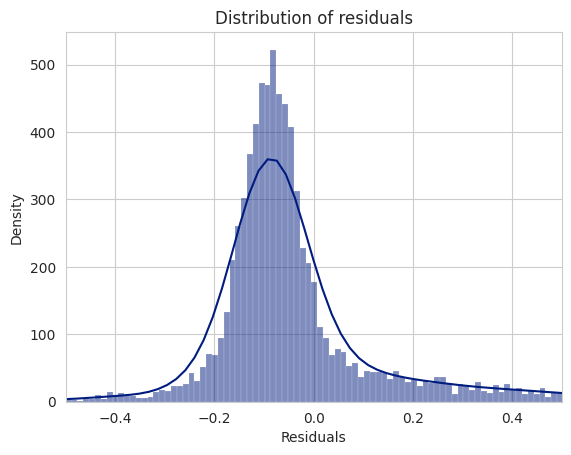

In [36]:
y_pred=reg_model.predict(ind)
residuals=dep-y_pred
sns.histplot(residuals,kde=True)
plt.title('Distribution of residuals')
plt.xlim(-0.5,0.5)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()



**The above analysis shows 𝜖𝑖~N(a,σ2) where "a" is very close to 0 but not exactly 0**

**Ideally mean should be 0**

**But here we can go with it as the difference is very very low as the datasize is nearly 8000**

**Lets check Residual vs Fitted plot**

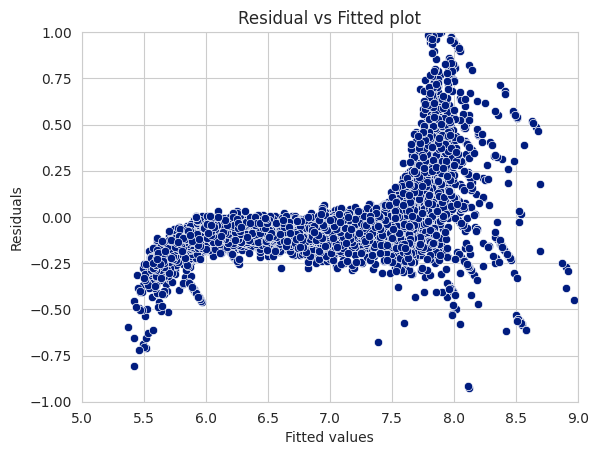

In [37]:
sns.scatterplot(x=y_pred,y=residuals)
plt.title('Residual vs Fitted plot')
plt.xlim(5,9)
plt.ylim(-1,1)

plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

**Mostly the residuals falls on or around the horizontal line passing through 0
but there is a clear deviation at the end and it may fail to validate our assumption of Homoscadasticity**

**Now lets check significance of each regressors on our Mean_rating**

In [38]:
ind.columns
coef=reg_model.coef_
coeff=np.round(coef,5)
Coef_df=pd.DataFrame({
    'Features': ind.columns,
    'Coefficients': coeff
})
Coef_df

,Features,Coefficients
0,Rank,-0.00020
1,Popularity,-0.00000
2,Users_Rated,0.00000
3,Number_episode,0.00008
4,average_episode_duration,0.00002
5,Year,-0.00383
6,ohe__Media_Type_music,0.02500
7,ohe__Media_Type_ona,0.04422
8,ohe__Media_Type_ova,0.00347
9,ohe__Media_Type_special,0.01452


**Interpretation of each regressor**

**Rank (-0.00020)** : A higher rank (worse rank) leads to a slight decrease in the Mean rating, which may imply lower ratings as rank increases.

**Popularity (-0.00000)**: Popularity has no significant impact on the Mean rating , suggesting that popularity doesn't directly affect the outcome.

**Users Rated (0.00000)**: The number of users who rated the anime has no significant impact, meaning the number of ratings doesn't influence the Mean rating.

**Number of Episodes (0.00008)**: Animes with more episodes show a small positive effect on the Mean rating, indicating a slight increase in ratings or other outcomes.

**Average Episode Duration (0.00002)**: Longer episode durations have a small positive impact, though the effect is minimal.

**Year (-0.00383)**: Animes produced in more recent years tend to have lower values in the Mean rating, which might reflect newer content being rated lower.
And people still are inclined towards old classics.



**Media Type (Encoded Variables)**:
**Baseline Media Type is Moives**


**Music (0.02500)**: Music-type animes increase the Mean rating by 0.025 units compared to the baseline media type which is moives.

ONA (**0.04422**): **ONAs** (**Original Net Animations**) increase the mean rating by 0.04422 units compared to the baseline media type.

OVA (**0.00347**): **OVAs** (**Original Video Animations**) have a small positive effect on the dependent variable, though less impactful than other types.

**Special (0.01452)**: Special episodes tend to increase the dependent variable slightly. As people continue to stick to their content

**TV (0.02222)**: TV animes increase the mean rating by 0.02222 compared to baseline media.

**ONA has the most effect as compaired to baseline type.**

**Other Encoded Variables**:
**Finished Airing (0.01691)**: Due to one can rate better after completely watching the content rather than some parts


**Rating (Encoded Variables)**:
**Baseline Rating Used here is General Rated (Suitable for everyone)**

**PG (0.00213)**: PG-rated animes have a small positive effect compared to the baseline rating.

**PG-13 (-0.03155)**: PG-13-rated animes decrease the dependent variable slightly.

**R (-0.04119)**: R-rated animes decrease the dependent variable by a more significant margin.

**R+ (-0.07378)**: R+ rated animes significantly decrease the dependent variable.

**Season (Encoded Variables)**:
**Here the baseline variable is Fall season**

**Spring (-0.01152)**: Animes released in spring reduce the mean rating slightly.

**Summer (0.01734)**: Summer animes have a small positive impact compared to other seasons.

**Winter (-0.01142)**: Animes released in winter decrease the dependent variable slightly.

**Now we'll compute $R^2$adj.  for this model**

$R^2$adj. is a quantity which is used to access strength of the model that is how well the varience in Y is explained by our Xi's

$R^2$adj. lies between 0 to 1 and $R^2$adj. close to 1 indicates good model



$R^2_{adj} = 1 - \left( \frac{SS_{res} / (n - p - 1)}{SS_T / (n - 1)} \right)$

where,

$SS_{res} = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

$SS_T = \sum_{i=1}^{n} (y_i - \bar{y})^2$

n = Total number of data points

p= Total number of regressors(independent variables)


**Lets compute the above quantites for our fitted model**




In [39]:
n=data.shape[0]
p=data.shape[1]-1
y_pred=reg_model.predict(ind)
y_bar=sum(dep)/n
SS_res=sum((dep-y_pred)**2)
SS_t=sum((dep-y_bar)**2)
R2_adj=1-((SS_res/(n-p-1))/(SS_t/(n-1)))
R2_adj


0.8335867917554369

**An  $R^2$adj.   of 0.83 means that 83% of the variability in the dependent variable is explained by the model. This is a high percentage, suggesting that the model fits the data quite well.**

**Now we'll remove one the variable from 'Rank' and 'Popularity' and fit the model and then compute its  $R^2$adj.**

**We'll remove 'Popularity' because popularity variable is derived from various factors like users , engangement, etc . while 'Rank' is purely derived from 'Mean_rating'. So as we are dealing with multicollinearity removing 'Popularity'
is a good choice**

In [40]:
data_2=ndf.drop(columns=['Genres','Studio','Users','Popularity'])
ind2=data_2.drop(columns=['Mean_rating'])
dep2=data['Mean_rating']
reg_model2=LinearRegression()
reg_model2.fit(ind2,dep2)
n2=data_2.shape[0]
p2=data_2.shape[1]-1
y_pred2=reg_model2.predict(ind2)
y_bar2=sum(dep2)/n2
SS_res2=sum((dep2-y_pred2)**2)
SS_t2=sum((dep2-y_bar2)**2)
R2_adj_2=1-((SS_res2/(n2-p2-1))/(SS_t2/(n2-1)))
R2_adj_2




0.8335340648947457

**Inclusion and exclusion of 'Popularity' doesn't make any difference
We'll choose model without 'Popularity' as regressors**

**Most Important:: 83.35% variation in Mean_rating is explained by our predictors , which indicates a very good fit**

**Important takeways from the analysis**

- **As anime gains popularity through strong marketing, viewers set higher expectations. If these are unmet, it may lead to lower average ratings despite the anime’s wide appeal.**

- **Popular anime often attracts a larger, more diverse audience, including casual viewers who may not deeply connect with the content, potentially resulting in lower ratings.**

- **Comedy is the most commonly produced genre among animes**

- **Studios like Kyoto Animation, ufotable, and bones focus on quality over quantity, producing fewer anime but achieving higher average ratings.**

- **High-output studios like Sunrise may produce more anime but don’t always reach the same level of average ratings, indicating a balance between quantity and quality.**

- **Spring leads in anime releases, while summer sees the fewest. Interestingly, fall releases tend to have the highest average ratings. As seasons progress from fall to summer, both the number of anime releases and their mean ratings decline, suggesting that audience engagement may taper off as the year progresses.**

-  **G-rated animes** **have the lowest mean rating, indicating that family-friendly content may not resonate as strongly with audiences seeking more diverse themes.**
- **Ratings increase from G to PG to R-rated** **content, reflecting a preference for more mature themes, despite fewer animes in these categories.**

- **Real-life data often deviates from strict mathematical assumptions,In the current regression process, homoscedasticity is not fully followed, which is a limitation of this analysis.**

- **Recent anime tend to have lower mean ratings, suggesting newer content is rated lower, while audiences still prefer classic, older animes.**


- **Information from the Regression Coefficients**:

    - **Among all non-catogorical regressors only 'Year of production' has significant impact on mean rating. Mean rating decreases as year progresses.**
  

- **Interpretation of encoded variable's coefficient is relative to baseline category (which was dropped to avoid multicollinearity).**
    - **For Media type category 'Moive' was dropped so it'll be base to compare other media type regressor coefficients**. **The interpretation is done in following manner :**
    
   - **Music Type has coeffficient 0.025 , it means if we keep rest of the factors constant a anime with music type will have 0.025 rating higher than if it was a Moive.**
   - **So we can say animes released as ONA perform better than other types if we control rest of the regressors**

 - **For category of Airing (finished or currently airing) we can say animes which are finished airing has good rating . There could be several reasons for this.Viewers may have a more complete understanding and appreciation of the content once the entire series has been watched, leading to higher ratings for finished series.**

 - **For rating category baseline category is genereal rated.**
    - **We see a interesting point here, even though general rated animes have least average rating among all , but after controlling rest of the regressosrs it performs better than r and r+ rated animes.** **Only PG rated animes have slighltly positive effect on rating than general.** **One can say  this implies that general-rated content may have broader appeal and be more favorably received when other elements (like episode length, studio, marketing,etc) are controlled efficiently.**
 - **For our last categorical variable in this analysis ( Season in which anime is released) fall is used as baseline.**
   - **A very similar pattern to above category is also observed here.** **In EDA summer category had least average rating but here after controlling rest of the factors animes released in summer has better average rating than others.**

**Forward Selection and Backword Elimination**


In [41]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming 'data' contains the dataset with independent and dependent variables
X = ind  # Independent variables
y = dep  # Dependent variable

# Add a constant term (intercept) for the statsmodels model
X = sm.add_constant(X)

# Step 1: Backward Elimination
def backward_elimination(X, y, significance_level=0.05):
    num_vars = len(X.columns)
    for i in range(num_vars):
        regressor_OLS = sm.OLS(y, X).fit()
        max_p_value = max(regressor_OLS.pvalues)
        if max_p_value > significance_level:
            max_p_value_index = regressor_OLS.pvalues.idxmax()
            X = X.drop(columns=[max_p_value_index])
        else:
            break
    return X

# Step 2: Forward Selection
def forward_selection(X, y, significance_level=0.05):
    initial_features = []
    for i in X.columns:
        regressor_OLS = sm.OLS(y, sm.add_constant(pd.DataFrame(X[initial_features + [i]]))).fit()
        p_value = regressor_OLS.pvalues[i]
        if p_value < significance_level:
            initial_features.append(i)
    return X[initial_features]

# Backward Elimination
X_opt = backward_elimination(X, y)

# Forward Selection
X_selected = forward_selection(X, y)

# Final model after selection
regressor_OLS_final = sm.OLS(y, X_selected).fit()

# Summary of the final model
print(regressor_OLS_final.summary())


                            OLS Regression Results                            
Dep. Variable:            Mean_rating   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     3541.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:45:50   Log-Likelihood:                -2140.7
No. Observations:                7788   AIC:                             4305.
Df Residuals:                    7776   BIC:                             4389.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   